In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
flows = pd.read_csv("../data/inflows of foreign population by nationality.csv", low_memory=False)

In [3]:
flows.head()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0,NaN,NaN
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0,NaN,NaN
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0,NaN,NaN
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0,NaN,NaN
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0,NaN,NaN


In [12]:
flows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464640 entries, 0 to 464639
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CO2                           464640 non-null  object 
 1   Country of birth/nationality  464640 non-null  object 
 2   VAR                           464640 non-null  object 
 3   Variable                      464640 non-null  object 
 4   GEN                           464640 non-null  object 
 5   Gender                        464640 non-null  object 
 6   COU                           464640 non-null  object 
 7   Country                       464640 non-null  object 
 8   YEA                           464640 non-null  int64  
 9   Year                          464640 non-null  int64  
 10  Value                         464637 non-null  float64
 11  Flag Codes                    3 non-null       object 
 12  Flags                         3 non-null    

In [3]:
flows.isna().sum()


CO2                                  0
Country of birth/nationality         0
VAR                                  0
Variable                             0
GEN                                  0
Gender                               0
COU                                  0
Country                              0
YEA                                  0
Year                                 0
Value                                3
Flag Codes                      464637
Flags                           464637
dtype: int64

There are three null values in 'Value'. Let's check them out.

In [4]:
null_values = flows[flows['Value'].isna()]
print(null_values)


        CO2 Country of birth/nationality  VAR  \
18616   BEL                      Belgium  B11   
79368   HKG             Hong Kong, China  B11   
191631   NS                   Not stated  B11   

                                            Variable  GEN Gender  COU  \
18616   Inflows of foreign population by nationality  TOT  Total  BEL   
79368   Inflows of foreign population by nationality  TOT  Total  BEL   
191631  Inflows of foreign population by nationality  TOT  Total  BEL   

        Country   YEA  Year  Value Flag Codes            Flags  
18616   Belgium  2010  2010    NaN          e  Estimated value  
79368   Belgium  2010  2010    NaN          e  Estimated value  
191631  Belgium  2010  2010    NaN          e  Estimated value  


In [5]:
# dropping the total migrants value for belgium for 2010.
flows = flows.dropna(subset=['Value'])
flows_cleaned = flows.dropna(subset=['Value'])

# dropping columns that we don't need
flows_cleaned = flows.drop(columns=['Flag Codes', 'Flags'])
flows_cleaned.head()


,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0


In [7]:
flows['Variable'].unique

<bound method Series.unique of 0          Inflows of foreign population by nationality
1          Inflows of foreign population by nationality
2          Inflows of foreign population by nationality
3          Inflows of foreign population by nationality
4          Inflows of foreign population by nationality
                              ...                      
464635    Outflows of foreign population by nationality
464636    Outflows of foreign population by nationality
464637    Outflows of foreign population by nationality
464638    Outflows of foreign population by nationality
464639    Outflows of foreign population by nationality
Name: Variable, Length: 464637, dtype: object>

In [5]:
inflows_cleaned = flows_cleaned[flows_cleaned['Variable'] == 'Inflows of foreign population by nationality']

In [6]:
print(f"size of the dataset' {inflows_cleaned.shape}")

size of the dataset' (112536, 11)


In [7]:
inflows_cleaned = inflows_cleaned[inflows_cleaned['Country of birth/nationality'] != "Total"]

In [8]:
inflows_cleaned.isna().sum()

CO2                             0
Country of birth/nationality    0
VAR                             0
Variable                        0
GEN                             0
Gender                          0
COU                             0
Country                         0
YEA                             0
Year                            0
Value                           0
dtype: int64

Total Inflows of migrants in a given country

In [9]:
fig = px.choropleth(
    data_frame=inflows_cleaned.groupby(['COU', 'Year', "Country"], as_index=False)['Value'].sum(),
    locations="COU",
    animation_frame="Year",
    animation_group = "COU",
    color="Value",
    title="Inflows of Foreign Population",
    color_continuous_scale="Viridis",
    projection="equirectangular", 
    labels={"Value": "Migration Value"},
    hover_name="Country",
    template="ggplot2",
)

fig.show()

In [23]:
import plotly.io as pio
pio.write_image(fig, '../results/total_foreign_population_inflows_2000.png',scale=6, width=1080, height=1080)

In [28]:
fig.write_html("../results/migrants_inflows_over_time.html")

ok, what is happening in Turkiye? there are migrants in 2010. then none for five years. then again in 2016?


In [ ]:
inflows_cleaned = flows_cleaned[flows_cleaned['Variable'] == 'Inflows of foreign population by nationality']

In [36]:
flows_cleaned['Variable'].unique()

array(['Inflows of foreign population by nationality',
       'Outflows of foreign population by nationality',
       'Stock of foreign-born population by country of birth',
       'Stock of foreign population by nationality',
       'Acquisition of nationality by country of former nationality'],
      dtype=object)

In [7]:
inflows_outflows = flows_cleaned[(flows_cleaned['Variable'] == 'Inflows of foreign population by nationality') | (flows_cleaned['Variable'] == 'Outflows of foreign population by nationality')]

In [47]:
inflows_outflows

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0
...,...,...,...,...,...,...,...,...,...,...,...
464635,OMN,Oman,B12,Outflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2021,2021,27.0
464636,KNA,Saint Kitts and Nevis,B12,Outflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2021,2021,27.0
464637,SLE,Sierra Leone,B12,Outflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2021,2021,20.0
464638,LKA,Sri Lanka,B12,Outflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2021,2021,30.0


In [8]:
inflows_outflows = inflows_outflows[inflows_outflows['Country of birth/nationality'] != "Total"]

In [9]:
long_lat = pd.read_csv("../data/countries_codes_and_coordinates.csv")
long_lat.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Åland Islands,"""AX""","""ALA""","""248""","""60.116667""","""19.9"""
2,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
3,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
4,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""


In [10]:
long_lat.rename(columns={'Alpha-3 code': 'CO2'}, inplace=True)
long_lat = long_lat[['CO2', 'Latitude (average)', 'Longitude (average)']]


In [11]:
long_lat = long_lat.applymap(lambda x: x.replace('"', ''))


/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_31446/2932487403.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  long_lat = long_lat.applymap(lambda x: x.replace('"', ''))


In [55]:
long_lat.head()

,CO2,Latitude (average),Longitude (average)
0,AFG,33,65
1,ALA,60.116667,19.9
2,ALB,41,20
3,DZA,28,3
4,ASM,-14.3333,-170


In [12]:
long_lat.dtypes

CO2                    object
Latitude (average)     object
Longitude (average)    object
dtype: object

In [13]:
# Ensure the 'CO2' column in both dataframes have the same datatype
inflows_outflows['CO2'] = inflows_outflows['CO2'].str.strip().astype(str)
long_lat['CO2'] = long_lat['CO2'].str.strip().astype(str)




In [14]:
inflows_outflows.head()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0


In [15]:
long_lat.head()

,CO2,Latitude (average),Longitude (average)
0,AFG,33,65
1,ALA,60.116667,19.9
2,ALB,41,20
3,DZA,28,3
4,ASM,-14.3333,-170


In [16]:
inflows_outflows_cleaned_lat = pd.merge(inflows_outflows, long_lat, on='CO2')


In [55]:
inflows_outflows_cleaned_lat[(inflows_outflows_cleaned_lat['Year'] == 2022) & 
                                                 (inflows_outflows_cleaned_lat['Variable'] == 'Inflows of foreign population by nationality')].nlargest(10, "Value")

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Latitude (average),Longitude (average)
76277,IND,India,B11,Inflows of foreign population by nationality,TOT,Total,USA,United States,2022,2022,125100.0,20,77
75427,IND,India,B11,Inflows of foreign population by nationality,TOT,Total,CAN,Canada,2022,2022,118100.0,20,77
115771,MAR,Morocco,B11,Inflows of foreign population by nationality,TOT,Total,FRA,France,2022,2022,26976.0,32,-5
2223,DZA,Algeria,B11,Inflows of foreign population by nationality,TOT,Total,FRA,France,2022,2022,20151.0,28,3
174101,TUN,Tunisia,B11,Inflows of foreign population by nationality,TOT,Total,FRA,France,2022,2022,16880.0,34,9
75959,IND,India,B11,Inflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2022,2022,14028.0,20,77
72393,HND,Honduras,B11,Inflows of foreign population by nationality,TOT,Total,MEX,Mexico,2022,2022,13762.0,15,-86.5
135997,PHL,Philippines,B11,Inflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2022,2022,11676.0,13,122
35430,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2022,2022,10407.0,35,105
275,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,FRA,France,2022,2022,9896.0,33,65


In [85]:
# for inflows
import plotly.express as px

def create_migration_map(year, inflows_outflows_cleaned_lat, long_lat):
    # Filter data for the specified year
    data_for_year = inflows_outflows_cleaned_lat[(inflows_outflows_cleaned_lat['Year'] == year) & 
                                                 (inflows_outflows_cleaned_lat['Variable'] == 'Inflows of foreign population by nationality')]
    
    # Identify the top 10 migration flows for the year
    top_10_for_year = data_for_year.nlargest(10, 'Value')
    top_10_for_year['Value'] = top_10_for_year.groupby('CO2')['Value'].transform('sum')
    # Create choropleth map
    fig = px.choropleth(top_10_for_year,
                        locations="CO2",
                        color="Value",
                        hover_name="Value",
                        projection="natural earth",
                        title=f"Top 10 Migration Inflows in {year}",
                        color_continuous_scale=px.colors.sequential.Plasma)

    # Add lines for top 10 countries
    for _, row in top_10_for_year.iterrows():
        origin = long_lat[long_lat['CO2'] == row['CO2']]
        destination = long_lat[long_lat['CO2'] == row['COU']]
        
        if not origin.empty and not destination.empty:
            fig.add_scattergeo(
                locationmode='ISO-3',
                lon=[origin['Longitude (average)'].values[0], destination['Longitude (average)'].values[0]],
                lat=[origin['Latitude (average)'].values[0], destination['Latitude (average)'].values[0]],
                mode='lines+markers',
                text=[row['Country of birth/nationality'], row['Country']],
                marker=dict(size=10, color=['red', 'green']),  # Red for origin, green for destination
                showlegend=False
            )

    fig.update_layout(geo=dict(showcountries=True, countrycolor="RebeccaPurple"))

    return fig


In [52]:
# top 10 inflows in 2010
year_to_display = 2010
fig = create_migration_map(year_to_display, inflows_outflows_cleaned_lat, long_lat)
fig.show()

In [ ]:
import plotly.io as pio
pio.write_image(fig, '../results/top_10_migration_inflows_2010.png',scale=6, width=1080, height=1080)

In [87]:
# 2020
year_to_display = 2020
fig = create_migration_map(year_to_display, inflows_outflows_cleaned_lat, long_lat)
fig.show()

In [88]:
# import plotly.io as pio
pio.write_image(fig, '../results/top_10_migration_inflows_2020.png',scale=4)

In [89]:
# for outflows
import plotly.express as px

def create_migration_map(year, inflows_outflows_cleaned_lat, long_lat):
    # Filter data for the specified year
    data_for_year = inflows_outflows_cleaned_lat[(inflows_outflows_cleaned_lat['Year'] == year) & 
                                                  (inflows_outflows_cleaned_lat['Variable'] == 'Outflows of foreign population by nationality')]

    # Identify the top 10 migration flows for the year
    top_10_for_year = data_for_year.nlargest(10, 'Value')
    top_10_for_year['Value'] = top_10_for_year.groupby('CO2')['Value'].transform('sum')
    # Create choropleth map
    fig = px.choropleth(top_10_for_year,
                        locations="CO2",
                        color="Value",
                        hover_name="Country",
                        projection="natural earth",
                        title=f"Top 10 Return of Native Population in {year}",
                        color_continuous_scale=px.colors.sequential.Plasma)

    # Add lines for top 10 countries
    for _, row in top_10_for_year.iterrows():
        origin = long_lat[long_lat['CO2'] == row['COU']]
        destination = long_lat[long_lat['CO2'] == row['CO2']]
        
        if not origin.empty and not destination.empty:
            fig.add_scattergeo(
                locationmode='ISO-3',
                lon=[origin['Longitude (average)'].values[0], destination['Longitude (average)'].values[0]],
                lat=[origin['Latitude (average)'].values[0], destination['Latitude (average)'].values[0]],
                mode='lines+markers',
                text=[row['CO2'], row['COU']],
                marker=dict(size=10, color=['red', 'green']),  # Red for origin, green for destination
                showlegend=False
            )

    fig.update_layout(geo=dict(showcountries=True, countrycolor="RebeccaPurple"))

    return fig


In [90]:
year_to_display = 2020
fig = create_migration_map(year_to_display, inflows_outflows_cleaned_lat, long_lat)
fig.show()

In [91]:
pio.write_image(fig, '../results/top_10_migration_returns_2020.png',scale=4)

In [79]:
inflows_outflows_cleaned_lat[(inflows_outflows_cleaned_lat['Year'] == 2022) & 
                                                  (inflows_outflows_cleaned_lat['Variable'] == 'Outflows of foreign population by nationality')]

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Latitude (average),Longitude (average)
667,AFG,Afghanistan,B12,Outflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2022,2022,6.0,33,65
2616,DZA,Algeria,B12,Outflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2022,2022,15.0,28,3
6140,ARG,Argentina,B12,Outflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2022,2022,453.0,-34,-64
8033,AUS,Australia,B12,Outflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2022,2022,5013.0,-27,133
9016,AUT,Austria,B12,Outflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2022,2022,60.0,47.3333,13.3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191244,ESP,Spain,B12,Outflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2022,2022,219.0,40,-4
192314,SWE,Sweden,B12,Outflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2022,2022,156.0,62,15
192450,UZB,Uzbekistan,B12,Outflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2022,2022,21.0,41,64
194337,URY,Uruguay,B12,Outflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2022,2022,84.0,-33,-56


In [67]:
import plotly.express as px

def create_migration_bubble_map(year, inflows_outflows_cleaned_lat, long_lat):
    # Create separate DataFrames for inflows and outflows
    inflows_data = inflows_outflows_cleaned_lat[(inflows_outflows_cleaned_lat['Year'] == year) & 
                                                 (inflows_outflows_cleaned_lat['Variable'] == 'Inflows of foreign population by nationality')]
    
    outflows_data = inflows_outflows_cleaned_lat[(inflows_outflows_cleaned_lat['Year'] == year) & 
                                                  (inflows_outflows_cleaned_lat['Variable'] == 'Outflows of foreign population by nationality')]

    # Identify the top 10 inflows and outflows for the year
    top_10_inflows = inflows_data.nlargest(10, 'Value')
    top_10_outflows = outflows_data.nlargest(10, 'Value')

    # Combine inflows and outflows data
    combined_data = pd.concat([top_10_inflows, top_10_outflows])

    # Create bubble map
    fig = px.scatter_geo(top_10_outflows,
                         locations="CO2",
                         size="Value",
                         color="Variable",
                         hover_name="CO2",
                         projection="natural earth",
                         title=f"Bubble Map of Migration Flows for {year}",
                         color_discrete_sequence=['red', 'green'],
                         size_max=40)

    fig.update_layout(geo=dict(showcountries=True, countrycolor="RebeccaPurple"))

    return fig

# Example: Year 2018
year_to_display = 2022
fig_bubble_map = create_migration_bubble_map(year_to_display, inflows_outflows_cleaned_lat, long_lat)
fig_bubble_map.show()


# Let's see where are these migrants flowing from.

In [29]:
outflows_from_a_country_total = inflows_cleaned[inflows_cleaned['Country of birth/nationality'] != "Total"]

In [30]:
outflows_from_a_country_total.sort_values(by = "Value", ascending=False).head(5)

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
168236,SYR,Syria,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2015,2015,309699.0
143981,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,ITA,Italy,2007,2007,271443.0
143860,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2018,2018,251971.0
143861,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2019,2019,245047.0
143859,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2017,2017,230603.0


In [39]:
outflows_from_a_country_total['Country'].unique()
# 35 OECD countries.

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Hungary', 'Iceland', 'Italy',
       'Japan', 'Korea', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Slovak Republic', 'Spain',
       'Sweden', 'Switzerland', 'Türkiye', 'United Kingdom',
       'United States', 'Chile', 'Estonia', 'Slovenia', 'Greece',
       'Portugal', 'Israel', 'Ireland', 'Latvia'], dtype=object)

In [41]:
len(outflows_from_a_country_total['CO2'].unique())
# 35 unique birth countries

209

In [103]:
import plotly.express as px

filtered_data = outflows_from_a_country_total[outflows_from_a_country_total['Year'] == 2010]

# Limit the number of birth countries, for example, top 10
top_birth_countries = filtered_data.groupby('Country of birth/nationality')['Value'].sum().nlargest(10).index
top_migrating_countries = filtered_data.groupby('Country')['Value'].sum().nlargest(10).index
filtered_data = filtered_data[(filtered_data['Country of birth/nationality'].isin(top_birth_countries)) & (filtered_data['Country'].isin(top_migrating_countries)) ]

fig = px.parallel_categories(filtered_data.sort_values('Value', ascending=False),
                              dimensions=['Country of birth/nationality', 'Country'],
                              labels={'Country of birth/nationality': 'Birth Country', 'Country': 'Destination Country'},
                              color_continuous_scale=px.colors.sequential.Viridis,
                              title= "Top 10 Migration Flows in 2010") 

fig.show()


In [99]:
import plotly.graph_objects as go

def plot_migration_arc_diagram(data, year=2020, top_n=10):
    filtered_data = data[data['Year'] == year]

    top_birth_countries = filtered_data.groupby('Country of birth/nationality')['Value'].sum().nlargest(top_n).index
    top_migrating_countries = filtered_data.groupby('Country')['Value'].sum().nlargest(top_n).index

    filtered_data = filtered_data[
        (filtered_data['Country of birth/nationality'].isin(top_birth_countries)) &
        (filtered_data['Country'].isin(top_migrating_countries))
    ]

    nodes = list(set(filtered_data['Country of birth/nationality']).union(set(filtered_data['Country'])))

    links = []
    for _, row in filtered_data.iterrows():
        links.append({'source': row['Country of birth/nationality'], 'target': row['Country'], 'value': row['Value']})

    fig = go.Figure(data=[
        go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=nodes
            ),
            link=dict(
                source=[nodes.index(link['source']) for link in links],
                target=[nodes.index(link['target']) for link in links],
                value=[link['value'] for link in links]
            )
        )
    ])

    fig.update_layout(title=f"Top {top_n} Migration Flows in {year}")

    fig.show()


plot_migration_arc_diagram(outflows_from_a_country_total)


In [104]:
pio.write_image(fig, '../results/movements_of_top_10_outflowing_pop_2020.png',scale=6, width=1080, height=1080)

In [105]:
fig = px.choropleth(
    data_frame=outflows_from_a_country_total.groupby(['Country of birth/nationality', 'CO2', 'Year'], as_index=False)['Value'].sum(),
    locations="CO2",
    animation_frame="Year",
    animation_group="CO2",
    color="Value",
    title="Outflows of Native Population",
    color_continuous_scale="Viridis",
    projection="natural earth",
    labels={"Value": "Total Migration Value"},
    hover_name="Country of birth/nationality",
    template="plotly",
)

fig.show()

In [106]:
fig.write_html("../results/migration_outflows_animation.html", full_html=False, auto_open=False)

Hypothesis testing? statistical analysis.

# Top 10 emigrating countries

# Q2

2000-2010

In [107]:
# first decade
inflows_10 = inflows_cleaned[inflows_cleaned['Year'] <= 2010]
inflows_10['Year'].unique


<bound method Series.unique of 0         2000
1         2001
2         2002
3         2003
4         2004
          ... 
462371    2006
462372    2007
462373    2008
462374    2009
462375    2010
Name: Year, Length: 50577, dtype: int64>

In [108]:
inflows_10

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0
...,...,...,...,...,...,...,...,...,...,...,...
462371,FIN,Finland,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2006,2006,40.0
462372,FIN,Finland,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2007,2007,32.0
462373,FIN,Finland,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2008,2008,53.0
462374,FIN,Finland,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2009,2009,34.0


In [109]:
inflows_10 = inflows_10[inflows_10['CO2'] != 'TOT'].sort_values('Value', ascending=False).drop_duplicates('CO2')


In [110]:
inflows_10


,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
143981,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,ITA,Italy,2007,2007,271443.0
116072,MEX,Mexico,B11,Inflows of foreign population by nationality,TOT,Total,USA,United States,2002,2002,218822.0
40049,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,KOR,Korea,2007,2007,177034.0
140367,POL,Poland,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2006,2006,151743.0
139514,PHL,Philippines,B11,Inflows of foreign population by nationality,TOT,Total,JPN,Japan,2004,2004,96200.0
...,...,...,...,...,...,...,...,...,...,...,...
142247,PRI,Puerto Rico,B11,Inflows of foreign population by nationality,TOT,Total,CAN,Canada,2010,2010,10.0
43972,COK,Cook Islands,B11,Inflows of foreign population by nationality,TOT,Total,ESP,Spain,2005,2005,7.0
130766,NIU,Niue,B11,Inflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2005,2005,5.0
174033,TKL,Tokelau,B11,Inflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2002,2002,4.0


In [111]:
top_10_inflows = inflows_10.nlargest(10, 'Value')
top_10_inflows

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
143981,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,ITA,Italy,2007,2007,271443.0
116072,MEX,Mexico,B11,Inflows of foreign population by nationality,TOT,Total,USA,United States,2002,2002,218822.0
40049,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,KOR,Korea,2007,2007,177034.0
140367,POL,Poland,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2006,2006,151743.0
139514,PHL,Philippines,B11,Inflows of foreign population by nationality,TOT,Total,JPN,Japan,2004,2004,96200.0
56894,ECU,Ecuador,B11,Inflows of foreign population by nationality,TOT,Total,ESP,Spain,2000,2000,91141.0
120929,MAR,Morocco,B11,Inflows of foreign population by nationality,TOT,Total,ESP,Spain,2007,2007,84978.0
82841,IND,India,B11,Inflows of foreign population by nationality,TOT,Total,USA,United States,2005,2005,84680.0
24092,BOL,Bolivia,B11,Inflows of foreign population by nationality,TOT,Total,ESP,Spain,2006,2006,77755.0
41362,COL,Colombia,B11,Inflows of foreign population by nationality,TOT,Total,ESP,Spain,2001,2001,71220.0


In [112]:
import plotly.express as px
top_10_inflows['Birth_Country_Year'] = top_10_inflows['Country of birth/nationality'] + '(' + top_10_inflows['Year'].astype(str) + ')'
fig = px.parallel_categories(top_10_inflows.sort_values('Value', ascending=False), dimensions=['Birth_Country_Year', 'Country'], color='Value', color_continuous_scale=px.colors.sequential.Viridis, 
                             labels={'Birth_Country_Year': 'Birth Country (Year)', 'Country': 'Destination Country'},
                             title= "Top 10 Population Leaving their birth country in 2000-2010")
#fig.update_layout(margin=dict(r=200)) adjusting the length
fig.update_layout(coloraxis_colorbar=dict(x=1.1))
fig.show()


In [69]:
# ! pip install -U kaleido
import kaleido

In [115]:
pio.write_image(fig, '../results/top_10_outflows_2000_2010.jpeg',scale=4)

# Top 10 Emigrating countries from 2010-2020

In [116]:
inflows_10_second_decade = inflows_cleaned[(inflows_cleaned['Year'] > 2010) & (inflows_cleaned['Year'] <= 2020)]
inflows_10_second_decade['Year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [117]:
inflows_10_second_decade = inflows_10_second_decade[inflows_10_second_decade['CO2'] != 'TOT'].sort_values('Value', ascending=False).drop_duplicates('CO2')


In [118]:
inflows_10_second_decade = inflows_10_second_decade.nlargest(10, 'Value')
inflows_10_second_decade

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
168236,SYR,Syria,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2015,2015,309699.0
143860,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2018,2018,251971.0
40056,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,KOR,Korea,2014,2014,192858.0
140375,POL,Poland,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2014,2014,192172.0
116086,MEX,Mexico,B11,Inflows of foreign population by nationality,TOT,Total,USA,United States,2016,2016,173543.0
187776,VNM,Viet Nam,B11,Inflows of foreign population by nationality,TOT,Total,JPN,Japan,2019,2019,148167.0
187218,VEN,Venezuela,B11,Inflows of foreign population by nationality,TOT,Total,CHL,Chile,2019,2019,135850.0
180848,UKR,Ukraine,B11,Inflows of foreign population by nationality,TOT,Total,POL,Poland,2020,2020,111020.0
85788,IRQ,Iraq,B11,Inflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2018,2018,110315.0
78352,HTI,Haiti,B11,Inflows of foreign population by nationality,TOT,Total,CHL,Chile,2018,2018,108673.0


In [119]:
inflows_10_second_decade['Birth_Country_Year'] = inflows_10_second_decade['Country of birth/nationality'] + '(' + inflows_10_second_decade['Year'].astype(str) + ')'

fig = px.parallel_categories(inflows_10_second_decade.sort_values('Value', ascending=False), dimensions=['Birth_Country_Year', 'Country'], color='Value', color_continuous_scale=px.colors.sequential.Viridis, 
                             labels={'Birth_Country_Year': 'Birth Country (Year)', 'Country': 'Destination Country'},
                             title= "Top 10 Population Leaving their Birth Country in 2010-2020")
fig.update_layout(coloraxis_colorbar=dict(x=1.1))
fig.show()


In [120]:
pio.write_image(fig, '../results/migrations_outflows_2010-2020.jpeg',scale=4)

# Hypothesis Testing

In [121]:
from scipy.stats import ttest_ind
import numpy as np


t_statistic, p_value = ttest_ind(top_10_inflows['Value'], inflows_10_second_decade['Value'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between migration in two decades.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between migration in two decades.")


T-statistic: -1.3474349791946723
P-value: 0.19455770990677776
Fail to reject the null hypothesis: There is no significant difference between migration in two decades.


In [122]:
top_countries = ["United States", "Korea", "Japan", "Germany"]
inflows_top_countries = inflows_cleaned[inflows_cleaned['Country'].isin(top_countries)]

In [123]:
inflows_top_countries.head()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
409,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2000,2000,6434.0
410,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2001,2001,6384.0
411,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2002,2002,3896.0
412,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2003,2003,2606.0
413,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2004,2004,2313.0


/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_95479/1348082886.py:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




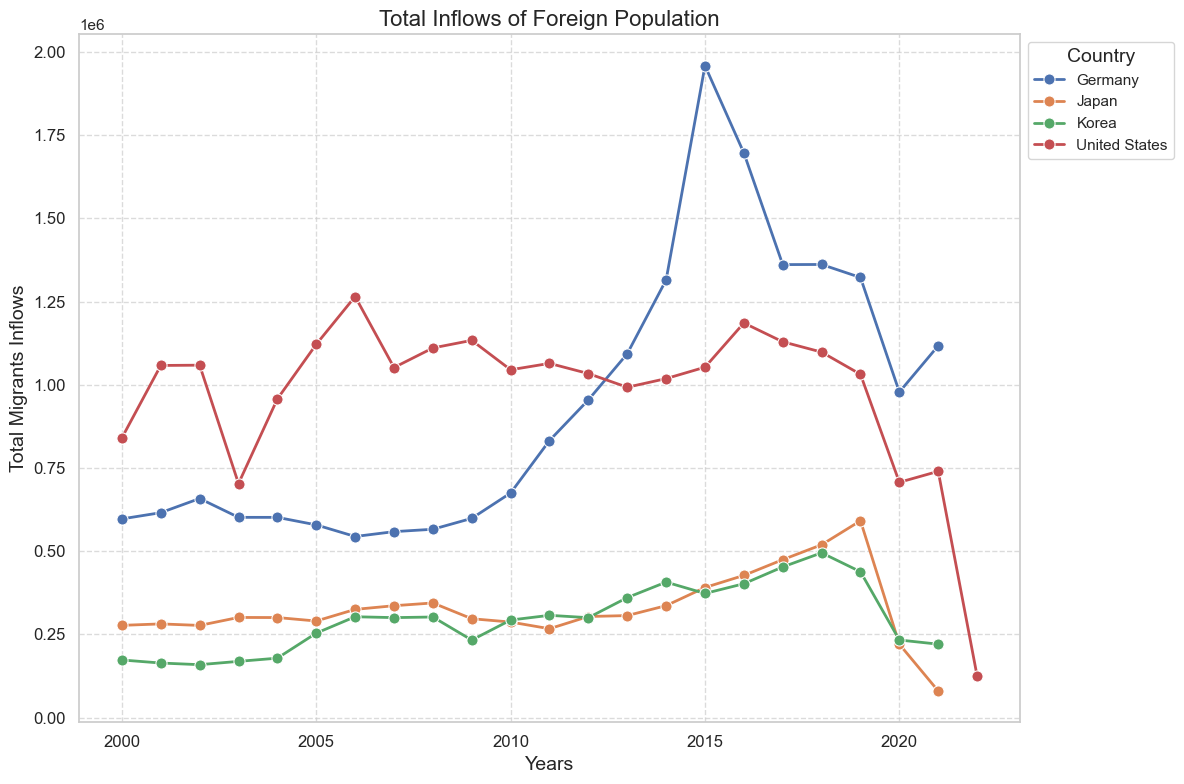

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")


sns.lineplot(data=inflows_top_countries, x="Year", y="Value", hue="Country", estimator=sum, ci = None, marker="o", markersize=8, linewidth=2)

plt.title("Total Inflows of Foreign Population", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Total Migrants Inflows", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.7)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.legend(title="Country", title_fontsize='14', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("../results/total_inflows_plot_for_top_countries.png")
plt.show()


In [151]:
pio.write_image(fig, 'total_inflows_plot_for_top_countries.png',scale=6)

# Top 10 outflows of foreign population from 2000-2010



In [129]:
outflows_of_foreign_pop = flows[flows['Variable'] == 'Outflows of foreign population by nationality']



In [130]:
outflows_10_first_decade = outflows_of_foreign_pop[(outflows_of_foreign_pop['Year'] <= 2010)]
outflows_10_first_decade['Year'].unique()


array([2000, 2001, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2002, 2003])

In [133]:
len(outflows_10_first_decade['Country'].unique())

28

In [134]:
outflows_10_first_decade[(outflows_10_first_decade['CO2'] == 'AUS') & (outflows_10_first_decade['COU'] == 'AUS')]

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags


In [135]:
outflows_10_first_decade[(outflows_10_first_decade['CO2'] == 'US') & (outflows_10_first_decade['COU'] == 'US')]

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags


In [136]:
outflows_10_first_decade[(outflows_10_first_decade['CO2'] == 'GBR') & (outflows_10_first_decade['COU'] == 'GBR')]

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
183030,GBR,United Kingdom,B12,Outflows of foreign population by nationality,TOT,Total,GBR,United Kingdom,2010,2010,125000.0,NaN,NaN


In [137]:
outflows_10_first_decade = outflows_10_first_decade[(outflows_10_first_decade['CO2'] != 'GBR') & (outflows_10_first_decade['COU'] != 'GBR')]
outflows_10_first_decade = outflows_10_first_decade[outflows_10_first_decade['CO2'] != 'TOT'].sort_values('Value', ascending=False).drop_duplicates('CO2')


In [138]:
top_10_outflows = outflows_10_first_decade.nlargest(10, 'Value')
top_10_outflows

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
40073,CHN,China,B12,Outflows of foreign population by nationality,TOT,Total,KOR,Korea,2009,2009,121473.0,NaN,NaN
140391,POL,Poland,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2008,2008,119649.0,NaN,NaN
153381,SCG,Serbia and Montenegro,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2000,2000,89269.0,NaN,NaN
139536,PHL,Philippines,B12,Outflows of foreign population by nationality,TOT,Total,JPN,Japan,2004,2004,86261.0,NaN,NaN
144402,ROU,Romania,B12,Outflows of foreign population by nationality,TOT,Total,ESP,Spain,2009,2009,50473.0,NaN,NaN
176913,TUR,Türkiye,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2000,2000,40263.0,NaN,NaN
120952,MAR,Morocco,B12,Outflows of foreign population by nationality,TOT,Total,ESP,Spain,2010,2010,37662.0,NaN,NaN
88198,ITA,Italy,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2004,2004,35056.0,NaN,NaN
27308,BRA,Brazil,B12,Outflows of foreign population by nationality,TOT,Total,JPN,Japan,2009,2009,33153.0,NaN,NaN
95085,KOR,Korea,B12,Outflows of foreign population by nationality,TOT,Total,JPN,Japan,2010,2010,25101.0,NaN,NaN


In [139]:

top_10_outflows['Residence_Year'] = top_10_outflows['Country'] + '(' + top_10_outflows['Year'].astype(str) + ')'

fig = px.parallel_categories(top_10_outflows.sort_values('Value', ascending=False), dimensions=['Residence_Year', 'Country of birth/nationality'], color='Value', color_continuous_scale=px.colors.sequential.Viridis, 
                             labels={'Residence_Year': 'Temporary Residence (Year)', 'Country of birth/nationality': 'Birth Country'},
                             title= "Population Returning to their Birth Country in 2000-2010")
fig.update_layout(coloraxis_colorbar=dict(x=1.3))
fig.show()


In [140]:
pio.write_image(fig, '../results/population_returning_2000-2010.jpeg',scale=4)
# fig.write_image("../results/population_returning_2000-2010.jpeg")

# Outflows 2010-2020

In [141]:
outflows_10_second_decade = outflows_of_foreign_pop[(outflows_of_foreign_pop['Year'] > 2010) & (outflows_of_foreign_pop['Year'] <= 2020)]
outflows_10_second_decade['Year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [142]:
outflows_10_second_decade = outflows_10_second_decade[outflows_10_second_decade['CO2'] != 'TOT'].sort_values('Value', ascending=False).drop_duplicates('CO2')


In [143]:
outflows_10_second_decade = outflows_10_second_decade.nlargest(10, 'Value')
outflows_10_second_decade

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
143883,ROU,Romania,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2019,2019,198860.0,NaN,NaN
40083,CHN,China,B12,Outflows of foreign population by nationality,TOT,Total,KOR,Korea,2019,2019,181232.0,NaN,NaN
140399,POL,Poland,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2016,2016,133803.0,NaN,NaN
29499,BGR,Bulgaria,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2019,2019,66155.0,NaN,NaN
464245,IRQ,Iraq,B12,Outflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2019,2019,58631.0,NaN,NaN
187792,VNM,Viet Nam,B12,Outflows of foreign population by nationality,TOT,Total,JPN,Japan,2019,2019,52566.0,NaN,NaN
120955,MAR,Morocco,B12,Outflows of foreign population by nationality,TOT,Total,ESP,Spain,2013,2013,47463.0,NaN,NaN
327319,THA,Thailand,B12,Outflows of foreign population by nationality,TOT,Total,KOR,Korea,2019,2019,43747.0,NaN,NaN
192161,UUU,Unknown,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2016,2016,43118.0,NaN,NaN
80235,HUN,Hungary,B12,Outflows of foreign population by nationality,TOT,Total,DEU,Germany,2016,2016,42264.0,NaN,NaN


In [144]:

outflows_10_second_decade['Residence_Year'] = outflows_10_second_decade['Country'] + '(' + outflows_10_second_decade['Year'].astype(str) + ')'

fig = px.parallel_categories(outflows_10_second_decade.sort_values('Value', ascending=False), dimensions=['Residence_Year', 'Country of birth/nationality'], color='Value', color_continuous_scale=px.colors.sequential.Viridis, 
                             labels={'Residence_Year': 'Temporary Residence (Year)', 'Country of birth/nationality': 'Birth Country'},
                             title= "Population Returning to their Birth Country in 2010-2020")
fig.update_layout(coloraxis_colorbar=dict(x=1.1))
fig.show()


In [145]:
pio.write_image(fig, '../results/population_returning_2010-2020.jpeg',scale=4)
#fig.write_image("../results/population_returning_2010-2020.jpeg")

In [146]:
t_statistic, p_value = ttest_ind(top_10_outflows['Value'], outflows_10_second_decade['Value'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between migration in two decades.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between migration in two decades.")

T-statistic: -1.0189886081140824
P-value: 0.32170982041018215
Fail to reject the null hypothesis: There is no significant difference between migration in two decades.


In [147]:
top_countries = ['China', 'Poland', 'Romania']
outflows_10_first_decade = outflows_10_first_decade[outflows_10_first_decade['Country of birth/nationality'] != "Total"]
outlfows_top_countries = outflows_of_foreign_pop[outflows_of_foreign_pop['Country of birth/nationality'].isin(top_countries)]

/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_95479/2075159472.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




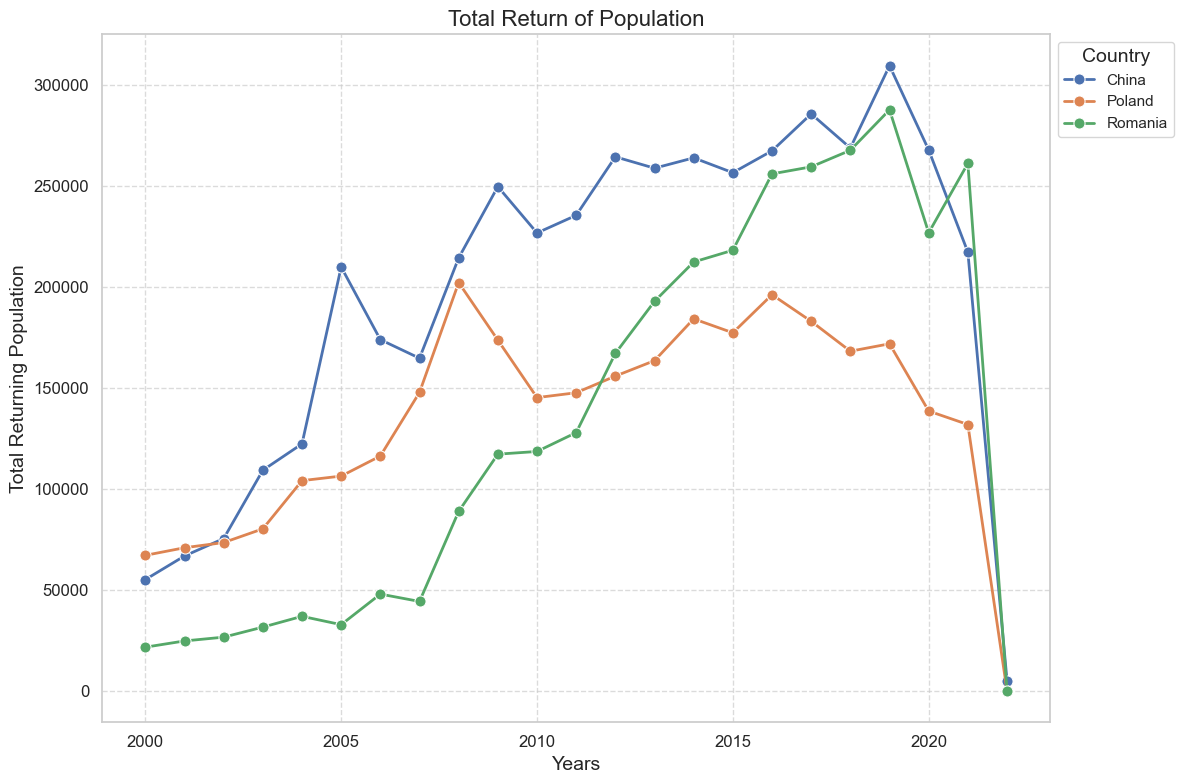

In [152]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")


sns.lineplot(data=outlfows_top_countries, x="Year", y="Value", hue="Country of birth/nationality", estimator=sum, ci = None, marker="o", markersize=8, linewidth=2)

plt.title("Total Return of Population", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Total Returning Population", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.7)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.legend(title="Country", title_fontsize='14', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("../results/total_pop_returns_for_top_countries.png")
plt.show()

In [149]:
pio.write_image(fig, '../results/total_returnees_plot_for_top_countries.png',scale=6)